In [1]:
import numpy as np
import os.path
import sys

%matplotlib inline
%load_ext wurlitzer
%config Completer.use_jedi = False
build_dir = '/rnsdhpc/code/_build/scale-orange'
sys.path[:0] = [os.path.join(build_dir, subdir)
                for subdir in ['python', 'src/nemesis', 'src/transcore', 'src/robus', 'src/geometria']]

In [2]:
import geometria

In [3]:
from omnibus.raytrace.imager import Imager
from omnibus.raytrace.load import load_orange

# Five boring volumes

In [4]:
m = load_orange("five-volumes.org.omn")

Generating ORANGE model XML input file from .org.omn...
            ...finished generating ORANGE model XML input file from .org.omn


In [5]:
print(m.geometry.describe())

************************************************
"global" (five-volumes.org.omn:9)
************************************************
:Type:         simple unit
:# Cells:      6 (offset = 0)
:# Surfaces:   12 (offset = 0)
:Bounding box: ``{-100 -100 -100 to 100 100 100}``

======= ========== ============================================================
Cell    Name       Surface logic
======= ========== ============================================================
0       [EXTERIOR] 0
                   (from ``five-volumes.org.omn:9``)
1       a          1 2 ~ & 3 & 4 ~ & 5 & 6 ~ & 7 &
                   (from ``five-volumes.org.omn:34``)
2       b          7 3 ~ 5 & 6 ~ & 8 & 9 ~ & 10 & &
                   (from ``five-volumes.org.omn:38``)
3       c          7 ~ 11 &
                   (from ``five-volumes.org.omn:42``)
4       d          0 ~ 1 2 ~ & 3 & 4 ~ & 5 & 6 ~ & ~ & 7 & 3 ~ 5 & 6 ~ & 8 & 9
                   ~ & 10 & ~ &
                   (from ``five-volumes.org.omn:46``)
5  

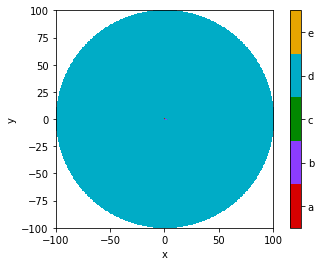

In [6]:
imager = Imager.from_extents(m.geometry, z=0, max_pixels=512, trace='cell')
imager.plot();

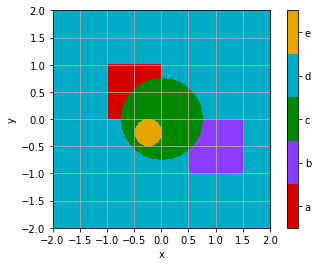

In [7]:
imager.scale(50)
plots = imager.plot()
ax = plots['ax']
ax.set_xticks(np.linspace(-2, 2, 8 + 1))
ax.set_yticks(np.linspace(-2, 2, 8 + 1))
ax.grid()